In [29]:
import sys
import os
import cv2
import numpy as np
from skimage.feature import hog
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sys.path.append(os.path.abspath(".."))


In [30]:
from utils.load_dataset import load_split

X_train_paths, y_train = load_split("../dataset/train")
X_val_paths, y_val = load_split("../dataset/valid")
X_test_paths, y_test = load_split("../dataset/test")

print(len(X_train_paths), len(X_val_paths), len(X_test_paths))
X_paths = X_train_paths + X_val_paths + X_test_paths
y_labels = y_train + y_val + y_test


42570 4853 2517


In [ ]:
np.random.seed(42)  

# 70% train, 30% temp (validation + test)
X_train_paths, X_temp, y_train, y_temp = train_test_split(
    X_paths, y_labels, test_size=0.3, stratify=y_labels, random_state=42
)

# 15% val, 15% test
X_val_paths, X_test_paths, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print(len(X_train_paths), len(X_val_paths), len(X_test_paths))

34958 7491 7491


In [32]:
def extract_features_from_paths(paths):
    features = []
    for path in paths:
        img = cv2.imread(path)
        img = cv2.resize(img, (128, 128))
        img = (img / 255.0).astype(np.float32)  # <-- float32 compatible
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


        feat = hog(
            gray,
            orientations=9,
            pixels_per_cell=(16,16),
            cells_per_block=(2,2),
            block_norm='L2-Hys'
        )
        features.append(feat)
    return np.array(features)

In [33]:
#Charger tes chemins
X_train_paths, y_train = load_split("../dataset/train")
X_val_paths, y_val = load_split("../dataset/valid")
X_test_paths, y_test = load_split("../dataset/test")


In [34]:
#Extraire les features HOG 
X_train = extract_features_from_paths(X_train_paths)
X_val = extract_features_from_paths(X_val_paths)
X_test = extract_features_from_paths(X_test_paths)


Classification Report :
              precision    recall  f1-score   support

       adult       0.79      0.73      0.76      1322
       child       0.75      0.91      0.82       941
     elderly       0.24      0.14      0.17       254

    accuracy                           0.74      2517
   macro avg       0.59      0.59      0.58      2517
weighted avg       0.72      0.74      0.72      2517



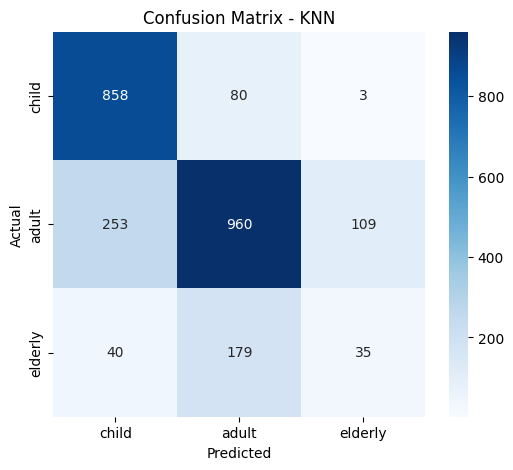

In [36]:
#KNN
# Créer et entraîner le modèle
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

#  Prédire sur le jeu de test
y_pred = knn.predict(X_test)

#  Classification report
print("Classification Report :")
print(classification_report(y_test, y_pred))

#  Matrice de confusion
cm = confusion_matrix(y_test, y_pred, labels=["child", "adult", "elderly"])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["child", "adult", "elderly"],
            yticklabels=["child", "adult", "elderly"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - KNN")
plt.show()


Decision Tree - Classification Report:
              precision    recall  f1-score   support

       adult       0.77      0.88      0.82      1322
       child       0.84      0.90      0.87       941
     elderly       0.00      0.00      0.00       254

    accuracy                           0.80      2517
   macro avg       0.54      0.59      0.56      2517
weighted avg       0.72      0.80      0.76      2517



C:\Users\SBS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\SBS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\SBS\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classifica

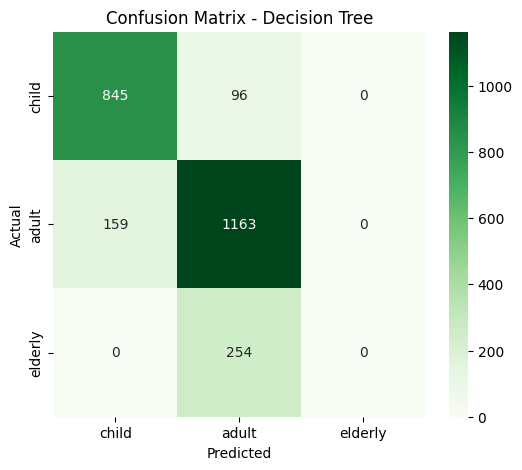

In [37]:
#  Decision Tree

dt = DecisionTreeClassifier(max_depth=10, criterion='gini', random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree - Classification Report:")
print(classification_report(y_test, y_pred_dt))

cm_dt = confusion_matrix(y_test, y_pred_dt, labels=["child", "adult", "elderly"])
plt.figure(figsize=(6,5))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens',
            xticklabels=["child", "adult", "elderly"],
            yticklabels=["child", "adult", "elderly"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()

Naive Bayes - Classification Report:
              precision    recall  f1-score   support

       adult       0.85      0.09      0.16      1322
       child       0.84      0.90      0.87       941
     elderly       0.18      0.98      0.31       254

    accuracy                           0.48      2517
   macro avg       0.62      0.66      0.45      2517
weighted avg       0.78      0.48      0.44      2517



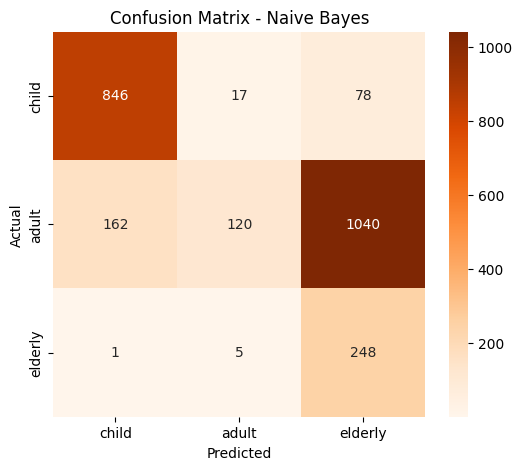

In [39]:
#  Naive Bayes

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

print("Naive Bayes - Classification Report:")
print(classification_report(y_test, y_pred_nb))

cm_nb = confusion_matrix(y_test, y_pred_nb, labels=["child", "adult", "elderly"])
plt.figure(figsize=(6,5))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Oranges',
            xticklabels=["child", "adult", "elderly"],
            yticklabels=["child", "adult", "elderly"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

In [40]:
# Sauvegarde des modèles
joblib.dump(knn, "../models/knn.pkl")
joblib.dump(dt, "../models/decision_tree.pkl")
joblib.dump(nb, "../models/naive_bayes.pkl")


['../models/naive_bayes.pkl']